# Assigment 4

# This is a mini-project assignment that includes only programming questions. You are asked to implement optimization algorithms for ML classification problems. 

## Marking of this assignment will be based on the correctness of your ML pipeline and efficiency of your code. 

## Upload your code on Learn dropbox and submit pdfs of the code and to Crowdmark.

## -----------------------------------------------------------------------------------------------------------

In [6]:
# !pip install numpy, scipy, sys

## Suggested way of loading data to python for the assigment. There are alternatives of course, you can use your preferred way if you want.

In [2]:
# Download the LIBSVM package from here: https://www.csie.ntu.edu.tw/~cjlin/libsvm/#download 
# If your download is successfull you should have the folder with name: libsvm-3.24.
# We will use this package to load datasets. 

# Enter the downloaded folder libsvm-3.24 through your terminal. 
# Run make command to compile the package.

# Load this auxiliary package.
import sys

# add here your path to the folder libsvm-3.24/python
path = "./libsvm-3.24/python"
# Add the path to the Python paths so Python can find the module.
sys.path.append(path)

# Load the LIBSVM module.
from svmutil import *

# Add here your path to the folder libsvm-3.24
path = "libsvm-3.24/heart_scale"

# Test that it works. This will load the data "heart_scale" 
# and it will store the labels in "b" and the data matrix in "A".
#b, A = svm_read_problem(path, return_scipy=True)
# Use "svm_read_problem" function to load data for your assignment.  

# Note that matrix "A" stores the data in a sparse format. 
# In particular matrix "A" is a list of dictionaries. 
# The length of the list gives you the number of samples.
# Each entry in the list is a dictionary. The keys of the dictionary are the non-zero features.
# The values of the dictionary for each key is a list which gives you the feature value. 

## Load other useful modules

In [3]:
import matplotlib.pyplot as plt

# Numpy is useful for handling arrays and matrices.
import numpy as np

## Datasets that you will need for this assignment.

In [4]:
# There is an extended selection of classification and regression datasets 
# https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/

# Out of all these datasets you will need the following 3 datasets, which are datasets for classification problems.
# 
# a9a dataset: https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html#a9a 
# This dataset is small, it is recommened to start your experiments with this dataset.
#
# news20.binary dataset: https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html#news20.binary
#
# covtype.binary dataset: https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html#covtype.binary
#
# Exploit the sparsity of the problem when you implement optimization methods.

## Training, Validation and Testing data

In [5]:
# All datasets above consist of training and testing data. 

# You should seperate the training data into training and validation data.
# Follow the instructions from the lectures about how you can use both training and validation data.
# You can use 10% of the training data as validation data and the remaining 90% to train the models.
# This is a suggested percentage, you can do otherwise if you wish.

# Do not use the testing data to influence training in any way. Do not use the testing data at all.
# Only your instructor and TA will use the testing data to measure generalization error. 
# If you do use the testing data to tune parameters or for training of the algorithms we will figure it out :-). 

## Optimization problems

### You need to solve the following optimization problems 

Hinge-loss
$$\mbox{minimize}_{x\in\mathbb{R}^d, \beta \in \mathbb{R}} \ \frac{1}{n} \sum_{i=1}^n \max \{0,1-b_i(a_i^Tx + \beta)\},$$
where $a_i\in\mathbb{R}^d$ is the feature vector for sample $i$ and $b_i$ is the label of sample $i$. The sub-gradient of the hinge-loss is given in the lecture slides (note that there is a small difference due to the intercept $\beta$). A smooth approximation of the function $f(z):=\max\{0,1-z\}$ is given by
$$
\psi_\mu(z) = 
\begin{cases}
0 & z\ge 1\\
(1-z)^2 & \mu < z < 1 \\
(1-\mu)^2 + 2(1-\mu)(\mu-z) & z \le \mu.
\end{cases}
$$
You can use the smooth approximation $\psi_\mu(z)$ for methods that work only for smooth functions. For sub-gradient methods you should use the sub-gradient.

L2-regularized logistic regression
$$\mbox{minimize}_{x\in\mathbb{R}^d,\beta\in\mathbb{R}} \ \lambda \|x\|_2^2 + \frac{1}{n} \sum_{i=1}^n \log (1+ \exp(-b_i(a_i^Tx + \beta))).$$
This is a smooth objective function, therefore, you should use gradient methods to solve it. You do not need sub-gradient methods for this problem.

## Optimization algorithms

In [6]:
# For this assignment you will need the following methods

# 1) Stochastic sub-gradient
# 2) Stochastic gradient
# 3) Mini-batch (sub-)gradient (you will have to decide what batching strategy to use, see lecture slides)
# 4) Stochastic average sub-gradient (SAG)
# 5) Stochastic average gradient (SAG)
# 6) Gradient descent with Armijo line-search
# 7) Acceleratd gradient with Armijo line-search (the same method as Q5 in Assignemnt 3)

# Information is provided in the lecture slides about parameter tuning and termination.
# However, the final decision of any parameter tuning and termination criteria is up to the students to make. 

# use this to split train and test data

### Definition of utitlities

In [34]:
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize


"""
=========
Utilities
=========
"""

def get_error(labels, pred_labels):
    return sum(abs(labels - pred_labels)) / len(labels)

def get_accuracy(labels, pred_labels):
    return 1 - .5*get_error(labels, pred_labels)

def my_experiment(A_train, A_test, b_train, b_test, methods, losses, max_iter, max_time, fontsize=15, linewidth=3, figsize=(12, 20)):
    for i, loss in enumerate(losses):
        plt.figure(1, figsize=figsize)
        plt.subplot(len(losses), 1, i+1)
        for method in methods:
            algorithm = method(loss)
            _, _, runtime, fvalues = algorithm.fit(A_train, b_train, max_iter = max_iter, max_time = max_time, return_fvalues = True)
            times = np.linspace(0, runtime, len(fvalues))
            plt.plot(times, fvalues, label=str(algorithm), linewidth=linewidth)
            plt.legend(fontsize=fontsize)
            plt.xlabel('Running time (sec)', fontsize=fontsize)
            plt.ylabel('Objective', fontsize=fontsize)
        plt.title(f'{str(loss)}', fontsize=fontsize*1.2)
        plt.show()

### Definition of loss 

In [26]:
"""
==============
Loss functions
==============
"""

class LogisticLoss(object):
    
    def __init__(self, lambda_):
        self.lambda_ = lambda_
    
    def __str__(self):
        return 'L2-norm logistic loss'
    
    def get_fvalue(self, A, b, x, beta):
        return self.lambda_*sum(x**2)+sum(np.log(1+np.exp(-b*(A@x+beta))))/A.shape[0]
        
    def get_gradient(self, A, b, x, beta):
        return (lambda t,c: (2*self.lambda_*x - A.T@(b*t)/c, sum(-b*t)/c))(1/(1+np.exp(b*(A@x+beta))), A.shape[0])
    
    def predict(self, A, x, beta):
        return 2*(1+np.exp(-beta-A@x)<2)-1

    
class HingeLoss(object):
    
    def __str__(self):
        return 'Hinge loss'
    
    def get_fvalue(self, A, b, x, beta):
        return (lambda v: v@(v>0)/A.shape[0])(1-b*(A@x+beta))
    
    def get_gradient(self, A, b, x, beta):
        return (lambda v: (-A.T@v/A.shape[0], -np.mean(v)))((1>b*(A@x+beta))*b)
        
    def predict(self, A, x, beta):
        return 2*(A@x>-beta)-1

    
class HingeLossSmoothed(HingeLoss):
    
    def __init__(self, mu):
        self.mu = mu
    
    def __str__(self):
        return 'Hinge loss smoothed'
    
    def get_fvalue(self, A, b, x, beta):
        return (lambda z,mu: (1-mu)*(z<=mu)@(1+mu-2*z)+(1>z)*(z>mu)@(1-z)**2)(b*(A@x+beta),self.mu)/A.shape[0]
    
    def get_gradient(self, A, b, x, beta):
        return (lambda c,z,mu: (c*((1>z)*(z>mu)*(z-1)-(z<=mu)*(1-mu))*b@A, c*(b*(z-1)*(1>z)@(z>mu)-b@(z<=mu)*(1-mu))))(2/A.shape[0], b*(A@x+beta), self.mu)

### Definition of classifier (the interface)

In [27]:
"""
===========
Classifiers
===========
"""

class Classifier(object):
    
    def __init__(self, objective):
        self.objective = objective
                
    def fit(self, A_train, b_train, epsilon=1e-2, max_iter=2000, max_time = 20, return_fvalues = False):
        runtime = 0
        self.x, self.beta = np.zeros(A_train.shape[1]), 0
        fvalues = [self.objective.get_fvalue(A_train, b_train, self.x, self.beta)]
        for num_iter in range(max_iter):
            st = time.time()
            if not self.update(A_train, b_train, num_iter) or runtime >= max_time:
                break
            runtime += time.time() - st
            if return_fvalues:
                fvalues.append(self.objective.get_fvalue(A_train, b_train, self.x, self.beta))
        return self.x, self.beta, runtime, fvalues
    
    def predict(self, A_test):
        return self.objective.predict(A_test, self.x, self.beta)

### Definition of full gradient methods

In [28]:
"""
=====================
Full gradient descent
=====================
"""
class GradientDescentLineSearch(Classifier):
    
    def __str__(self):
        return f'Gradient descent + armijo ({str(self.objective)})'
    
    def get_stepsize(self, A_train, b_train, gradient_x, gradient_beta):
        stepsize = 1.0
        gamma = 0.7
        fvalue_init = self.objective.get_fvalue(A_train, b_train, self.x, self.beta)
        gradient_norm = np.linalg.norm(gradient_x)**2 + np.linalg.norm(gradient_beta)**2
        while stepsize > 0:
            if self.objective.get_fvalue(A_train, b_train, self.x-stepsize*gradient_x, self.beta-stepsize*gradient_beta) < fvalue_init-stepsize*gamma*gradient_norm:
                break
            stepsize /= 2
        return stepsize
    
    def update(self, A_train, b_train, num_iter, min_stepsize = 1e-8):
        gradient_x, gradient_beta = self.objective.get_gradient(A_train, b_train, self.x, self.beta)
        stepsize = self.get_stepsize(A_train, b_train, gradient_x, gradient_beta)
        self.x, self.beta = self.x - stepsize*gradient_x, self.beta - stepsize*gradient_beta
        return stepsize > min_stepsize


class AcceleratedGradientDescent(GradientDescentLineSearch):
    
    def __str__(self):
        return f'Accelerated gradient descent + armijo ({str(self.objective)})'
    
    def swap(self):
        self.x, self.u = self.u, self.x
        self.beta, self.v = self.v, self.beta
    
    def update(self, A_train, b_train, num_iter, min_stepsize = 1e-8):
        if num_iter == 0:
            self.t, self.prev_t = 1, 1
            self.u, self.prev_x, self.v, self.prev_beta = self.x, self.x, self.beta, self.beta
        gradient_u, gradient_v = self.objective.get_gradient(A_train, b_train, self.u, self.v)
        self.swap()
        stepsize = self.get_stepsize(A_train, b_train, gradient_u, gradient_v)
        self.swap()
        self.prev_x, self.x = self.x, self.u - stepsize*gradient_u
        self.prev_beta, self.beta = self.beta, self.v - stepsize*gradient_v
        self.prev_t, self.t = self.t, .5*(1+np.sqrt(1+4*self.t**2))
        self.u = self.x+(self.prev_t-1)/self.t*(self.x-self.prev_x)
        self.v = self.beta+(self.prev_t-1)/self.t*(self.beta-self.prev_beta)
        return stepsize > min_stepsize

### Definition of stochastic methods

In [29]:
"""
==================
Stochastic methods
==================
"""

class StochasticGradientDescent(Classifier):
    
    def __str__(self):
        return f'Stochastic gradient descent ({str(self.objective)})'
    
    def sample(self, A_train, b_train):
        return (lambda idx:(A_train[idx], b_train[idx:idx+1]))(np.random.randint(A_train.shape[0]))

    def update(self, A_train, b_train, num_iter):
        A_sample, b_sample = self.sample(A_train, b_train)
        gradient_x, gradient_beta = self.objective.get_gradient(A_sample, b_sample, self.x, self.beta)
        stepsize = 1/np.sqrt(num_iter+1)
        self.x, self.beta = self.x-stepsize*gradient_x, self.beta-stepsize*gradient_beta
        return True

    
class BatchGradientDescent(StochasticGradientDescent):
    
    def __init__(self, objective, batch_size = 20):
        self.objective = objective
        self.batch_size = batch_size
    
    def __str__(self):
        return f'Batch gradient descent ({str(self.objective)})'
    
    def sample(self, A_train, b_train):
        return (lambda idx:(A_train[idx], b_train[idx]))(np.random.randint(A_train.shape[0], size=self.batch_size))
    

class StochasticAverageGradientDescent(StochasticGradientDescent):
    
    def __str__(self):
        return f'Stochastic average gradient descent ({str(self.objective)})'
    
    def update(self, A_train, b_train, num_iter):
        if num_iter%A_train.shape[0] == 0:
            self.reset(A_train, b_train)
        idx = np.random.randint(A_train.shape[0])
        A_sample, b_sample = self.sample(A_train, b_train)
        gradient_x, gradient_beta = self.objective.get_gradient(A_sample, b_sample, self.x, self.beta)
        prev_gradient_x, prev_gradient_beta = self.objective.get_gradient(A_sample, b_sample, self.init_x, self.init_beta)
        stepsize = 1/np.sqrt(num_iter+1)
        self.x = self.x-stepsize*(gradient_x-prev_gradient_x+self.init_gradient_x)
        self.beta = self.beta-stepsize*(gradient_beta-prev_gradient_beta+self.init_gradient_beta)
        return True
    
    def reset(self, A_train, b_train):
        self.init_x, self.init_beta = self.x, self.beta
        self.init_gradient_x, self.init_gradient_beta = self.objective.get_gradient(A_train, b_train, self.x, self.beta)

## Validation error: measure the validation error by calculating
$$
\frac{1}{t}\sum_{i\in\mbox{validation data}} \left| \ b_i^{\mbox{your model}} - b_i^{\mbox{true}} \ \right|
$$
where $t$ is the number of samples in your validation set. $b_i^{\mbox{true}}$ is the true label of the $i$-th sample. $b_i^{\mbox{your model}}$ is the label of the $i$-th sample of your model.

For hinge loss calculate $$b_i^{\mbox{your model}}:= \mbox{sign}(a_i^Tx + \beta).$$

For logistic regression calculate the predicted label by
$$
b_i^{\mbox{your model}}=
\begin{cases}
1 & \mbox{if } \frac{1}{1+e^{-(a_i^Tx + \beta)}} > 0.5\\
-1 & \mbox{otherwise}
\end{cases}
$$

## Question 1: Use the ML pipeline that is mentioned in slide 60 of Lecture 11 to train your model for the logistic regression problem (the hinge-loss problem does not have any hyper-parameters). Pick any algorithm that you want from the above suggested list to train the models. Report your ML pipeline. Print your Generalization Error. We will not measure running time for this pipeline. Running time will be measure only in Q2. Marks: 30.

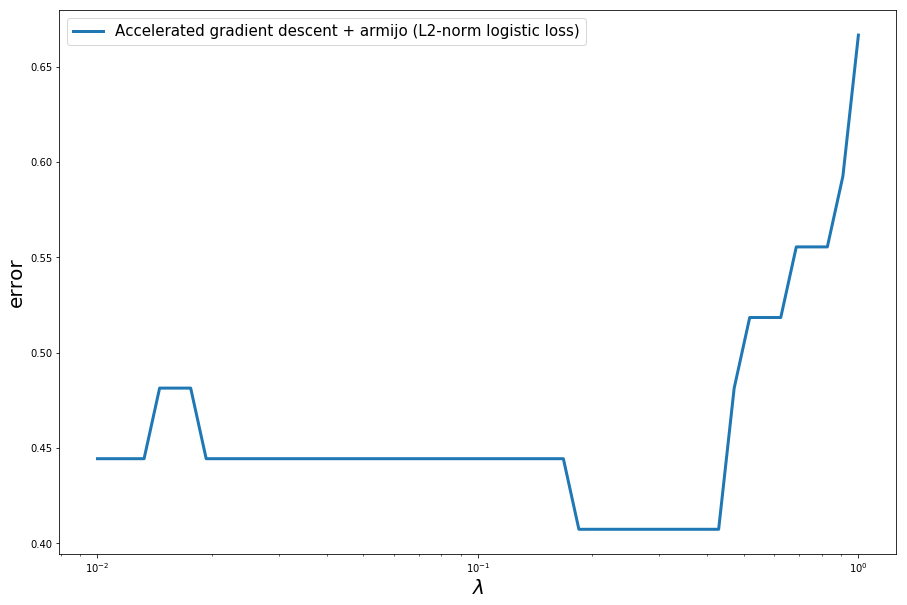

In [30]:
lambdas = np.logspace(-2, 0, 50)
errors = []
method = None
b_data, A_data = svm_read_problem('libsvm-3.24/heart_scale', return_scipy = True)
A_train, A_test, b_train, b_test = train_test_split(A_data, b_data, test_size=.2)
for l in lambdas:
    loss = LogisticLoss(l)
    method = AcceleratedGradientDescent(loss)
    method.fit(A_train, b_train, max_iter = 50)
    errors.append(get_error(b_test, method.predict(A_test)))
    
plt.figure(1, figsize=(15, 10))
plt.plot(lambdas, errors, label = str(method), linewidth=3)
plt.legend(fontsize=15)
plt.xlabel("$\lambda$", fontsize=20)
plt.ylabel("error", fontsize=20)
plt.xscale('log')
plt.show()

## Question 2: Plot the objective function (y-axis) vs running time in sec (x-axis). Have one plot for each optimization problem. In each plot show the performance of all relevant algorithms. For each plot use the parameter setting that gives you the best validation error in Q1 (this refers to the logistic regression probelm). Do not show plots for all parameter settings that you tried in Q1, only for the one that gives you the smallest validation error. Do not include computation of any plot data in the computation of the running time of the algorithm, unless the plot data are computed by the algorithm anyway. Make sure that the plots are clean and use appropriate legends. Note that we should be able to re-run the code and obtain the plots. Marks: 70.

### For this question, we will measure the running time of your stochastic sub-gradient method for the sparse dataset news20.binary for the hinge-loss problem. We will not measure the running time of any other combination of algorithm, dataset, problem. You need to implement the stochastic sub-gradient method and encapsulate it in a python class.

To make sure your object can be used by our script, your class should have two methods:

1. <strong>fit(self, train_data, train_label)</strong>. It will use stochastic sub-gradient method to minimize the hinge loss and store the optimized coefficients (i.e. $x, \beta$) in the instance. The "train_data" and "train_label" are similar to the output of "svm_read_problem". 
    * "train_data" is a list of $n$ python dictionaries (int -> float), which presents a sparse matrix. The keys (int) and values (float) in the dictionary at train_data[i] are the indices (int) and values (float) of non-zero entries of row $i$. 
    * "train_label" is a list of $n$ integers, it only has <strong>-1s and 1s</strong>. $n$ is the number of samples.  This function returns nothing.


2. <strong>predict(self, test_data)</strong>. It will predict the label of the input "test_data" by using the coefficients stored in the instance. The "test_data" has the same data structure as the "train_data" of the "fit" function. This function returns a list of <strong>-1s and 1s</strong> (i.e. the prediction of your labels).

You can also define other methods to help your programming, we will only call the two methods decribed above.

To let us import your class, you need to follow these rules:

1. You should name your python file by <strong>a4_[your student ID].py</strong>. For example, if your student id is 12345, then your file name is <strong>a4_12345.py</strong>
1. Your object name should be <strong>MyMethod</strong> (it's case sensitive).

Any violation of the above requirements will get error in our script and you will get at most 50% of the total score. Your solution will be mainly measured by the runing time of the <strong>fit</strong> function and the accuracy of the <strong>predict</strong> function. For example your method will be called and measured in following pattern:

    obj = MyMethod()
    st = time.time()
    obj.fit(train_data, train_label) # .fit() optimizes the objective and stores coefficients in obj.
    running_time = time.time() - st
    predict_label = obj.predict(test_data)
    accuracy = get_accuracy(predict_label, test_label) # this is a function we use to measure accuracy.
Then your accuracy will be measured by <strong>predict_labels</strong>, you don't have to implement "get_accuracy". When you finish your implementation, upload the .py file to Learn dropbox.

### Experiments

In [31]:
"""
==================
Initialize Methods
==================
"""
full_gradient_methods = [
    GradientDescentLineSearch,
    AcceleratedGradientDescent,
]

batch_stochastic_gradient_methods = [
    BatchGradientDescent,
]

stochastic_gradient_methods = [
    StochasticGradientDescent,
    StochasticAverageGradientDescent,
]

all_methods = [
    GradientDescentLineSearch,
    AcceleratedGradientDescent,
    BatchGradientDescent,
    StochasticGradientDescent,
    StochasticAverageGradientDescent,
]

losses = [
    LogisticLoss(0.001),
    HingeLoss(),
    HingeLossSmoothed(.5)
]

## a9a

In [32]:
b_data, A_data = svm_read_problem('a9a', return_scipy=True)
A_train, A_test, b_train, b_test = train_test_split(A_data, b_data, test_size=.3)

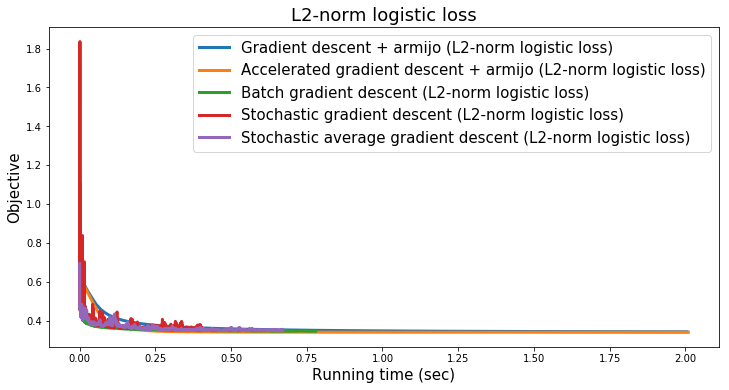

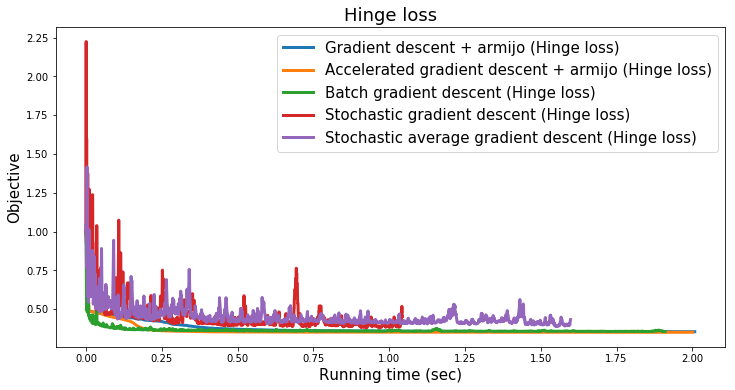

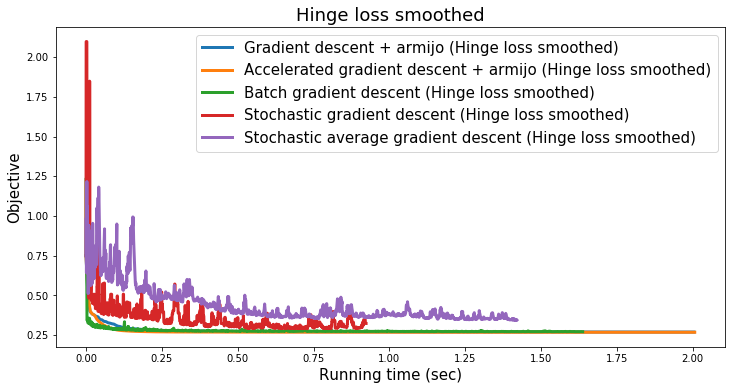

In [36]:
my_experiment(A_train, A_test, b_train, b_test, all_methods, losses, max_iter=2000, max_time = 2)

## news20.binary

In [41]:
path = 'news20.binary'
b_data, A_data = svm_read_problem(path, return_scipy=True)
A_train, A_test, b_train, b_test = train_test_split(A_data, b_data, test_size=.3)
print(f'min b: {min(b_data)}, max b: {max(b_data)}, A shape: {A_data.shape}')

min b: -1.0, max b: 1.0, A shape: (19996, 1355191)


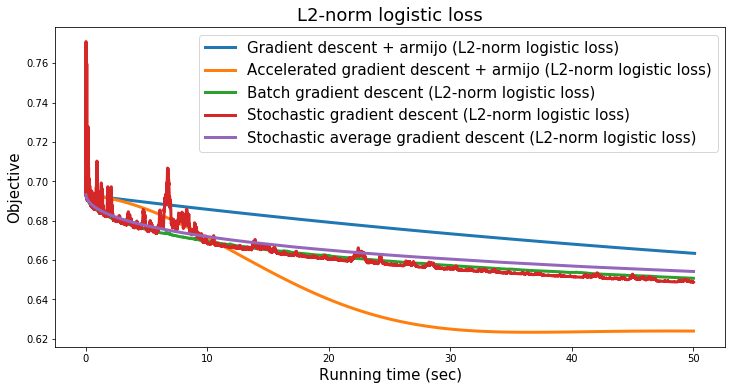

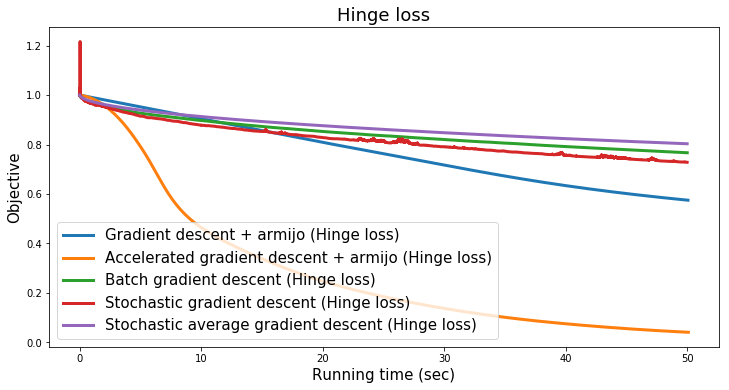

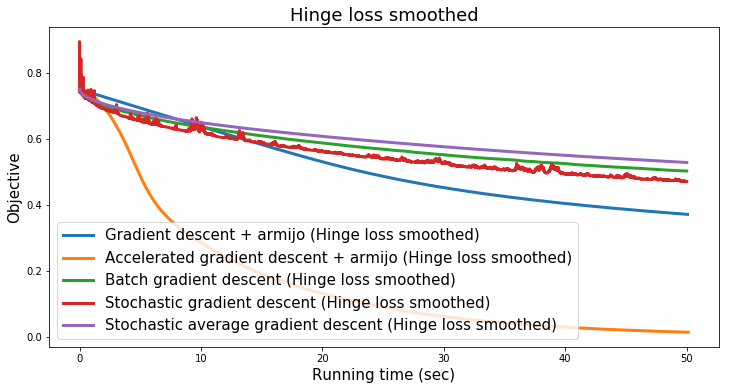

In [42]:
my_experiment(A_train, A_test, b_train, b_test, all_methods, losses, max_iter=2000000, max_time=50)

## covtype.binary

In [43]:
path = 'covtype.libsvm.binary'
b_data, A_data = svm_read_problem(path, return_scipy=True)
b_data = b_data*2 - 3
A_data = normalize(A_data, axis = 1, norm = 'l1')
A_train, A_test, b_train, b_test = train_test_split(A_data, b_data, test_size = 0.3)
print(f'min b: {min(b_data)}, max b: {max(b_data)}, A shape: {A_train.shape}')

min b: -1.0, max b: 1.0, A shape: (406708, 54)


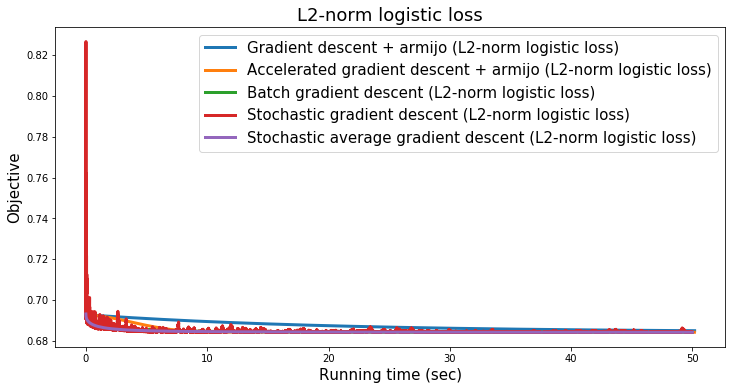

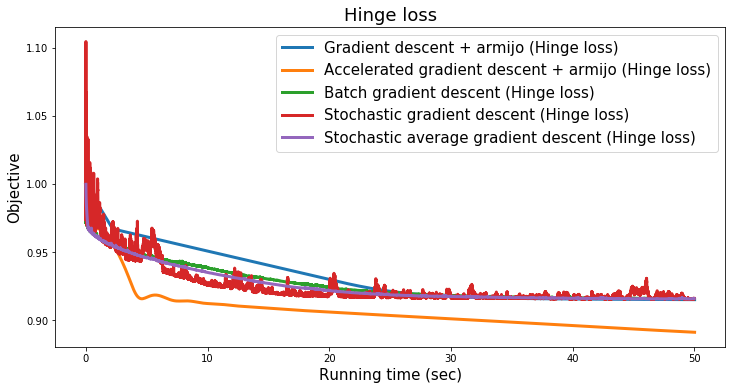

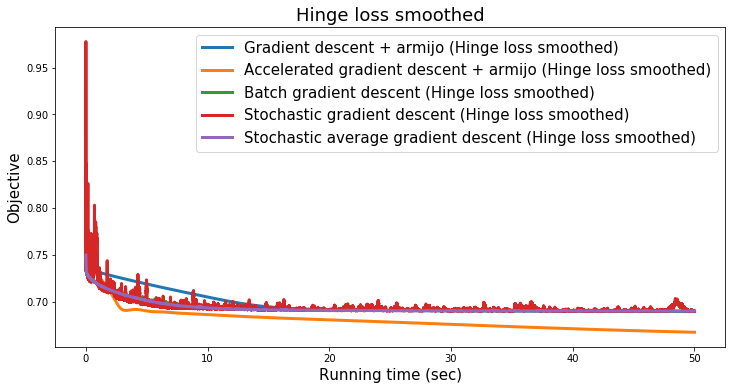

In [44]:
my_experiment(A_train, A_test, b_train, b_test, all_methods, losses, max_iter=2000000, max_time=50)

### Definition of MyMethod

In [127]:
from scipy.sparse import csr_matrix

class MyMethod(object):
    
    def __init__(self):
        self.num_cols = 1355192 # for news20 data set only
        self.objective = HingeLoss()
        self.algorithm = StochasticGradientDescent(self.objective)
    
    def fit(self, A_train, b_train, max_iter = 8000):
        A_train, b_train = self.parse_data(A_train, b_train)
        self.algorithm.fit(A_train, b_train, max_iter = max_iter, return_fvalues = False)
    
    def predict(self, A_test):
        A_test, _ = self.parse_data(A_test, [])
        return self.algorithm.predict(A_test)
    
    def parse_data(self, A, b):
        row_indices, col_indices, data = [], [], []
        for row_idx in range(len(A)):
            for col_idx, value in A[row_idx].items():
                data.append(value)
                row_indices.append(row_idx)
                col_indices.append(col_idx)
        A = csr_matrix((data, (row_indices, col_indices)), shape = (len(A), self.num_cols))
        b = np.array(b)
        return A, b

### Get the input

In [146]:
path = 'news20.binary'
b, A = svm_read_problem(path)
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size = 0.3)

### Train the model

In [130]:
my_method = MyMethod()
st = time.time()
my_method.fit(A_train, b_train)
runtime = time.time() - st
pred_b = my_method.predict(A_test)
acc = get_accuracy(b_test, pred_b)
print(f'Time: {runtime} sec\nAccuracy: {acc*100:.2f}%')

Time: 48.274516105651855 sec
Accuracy: 81.05%
